In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/medical_appointments.csv")

print(df.shape)
df.head()


(109593, 26)


,specialty,appointment_time,gender,no_show,disability,place,appointment_shift,age,under_12_years_old,over_60_years_old,...,storm_day_before,rain_intensity,heat_intensity,appointment_date_continuous,Hipertension,Diabetes,Alcoholism,Handcap,Scholarship,SMS_received
0,psychotherapy,17,F,yes,intellectual,Lake Marvinville,afternoon,9.0,1,0,...,1,no_rain,warm,2020-01-01,0,0,0,0,0,0
1,NaN,7,M,no,intellectual,ITAPEMA,morning,11.0,1,0,...,1,no_rain,cold,2020-01-01,0,0,0,0,0,0
2,speech therapy,16,M,no,intellectual,ITAJAÍ,afternoon,8.0,1,0,...,1,no_rain,warm,2020-01-01,0,0,0,0,0,0
3,speech therapy,14,M,yes,intellectual,Sarahside,afternoon,9.0,1,0,...,1,moderate,mild,2020-01-01,0,0,0,0,0,1
4,physiotherapy,8,M,no,motor,ITAJAÍ,morning,NaN,0,0,...,1,no_rain,mild,2020-01-01,0,0,0,0,0,0


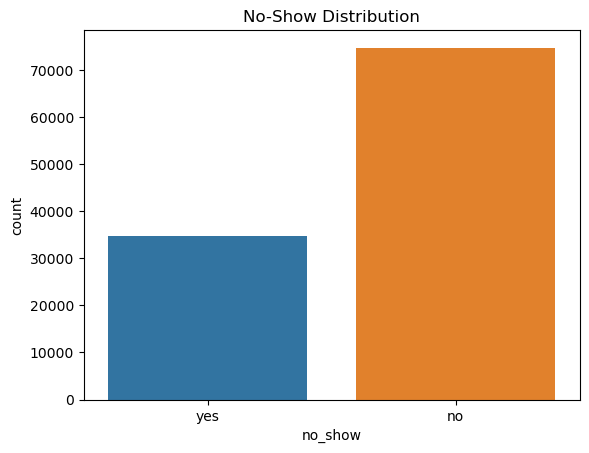

In [6]:
# Target distribution
sns.countplot(x="no_show", data=df)
plt.title("No-Show Distribution")
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


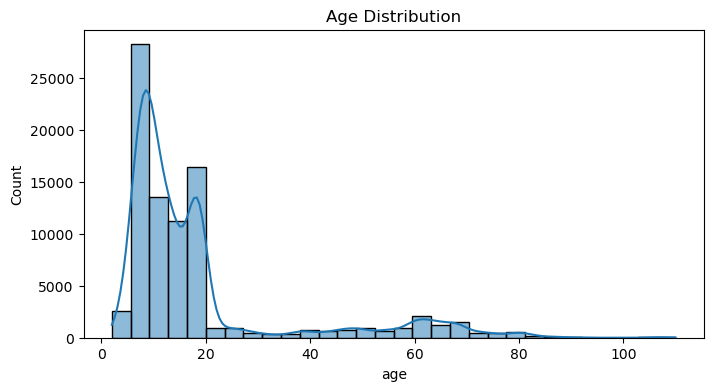

In [7]:
# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df["age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


In [15]:
# Correct mapping (case-insensitive)
df["no_show_binary"] = (
    df["no_show"]
    .str.strip()
    .str.lower()
    .map({"yes": 1, "no": 0})
)

# Sanity check
print(df[["no_show", "no_show_binary"]].head())
print(df["no_show_binary"].value_counts())
print(df["no_show_binary"].dtype)


  no_show  no_show_binary
0     yes               1
1      no               0
2      no               0
3     yes               1
4      no               0
no_show_binary
0    74761
1    34832
Name: count, dtype: int64
int64


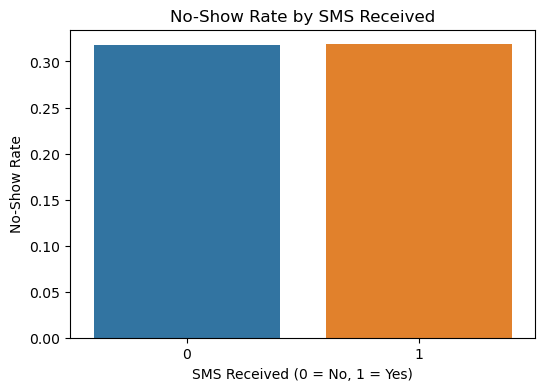

In [22]:

sms_noshow = (
    df.groupby("SMS_received")["no_show_binary"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(
    data=sms_noshow,
    x="SMS_received",
    y="no_show_binary"
)

plt.title("No-Show Rate by SMS Received")
plt.xlabel("SMS Received (0 = No, 1 = Yes)")
plt.ylabel("No-Show Rate")
plt.show()


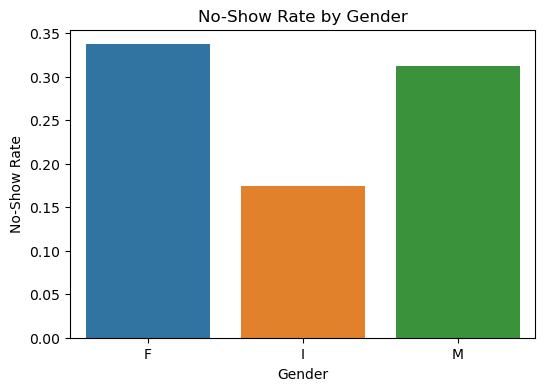

In [21]:
# No-show by gender
gender_noshow = (
    df.groupby("gender")["no_show_binary"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(
    data=gender_noshow,
    x="gender",
    y="no_show_binary"
)

plt.title("No-Show Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("No-Show Rate")
plt.show()

